# ROI detection on text images

## Goal
The goal of this task is to detect interested regions of interests (ROIs) in images (printed text or written text). The ROIs will be provided for annotation classification (annotated or non-annotated image).

## Current stage
06/07/18 Load the ground truth and compare against the ocr detected bounding boxes

## Approachs
Steps to finish the ROIs detection:
1. Load an image into memory
2. Perform Image processing, e.g., grayscale
3. Configure an OCR Engine (e.g., Tesseract)
4. Apply the OCR Engine on the image to obtain a list of detection
5. Run the ROIs algorithm to obtain a list of refined ROIs (bounding box location, x,y,width,height)
6. Plot the bounding box and save the boxes into a corresponding txt file.

Several classes are needed in this work:
- Utils.py
- OCREngine.py
- ImgProcessor.py
- Plot.py

## Package configuration
- Python3.6
- Tessearct 3.05, leptonica-1.74.4, instructions:
    - a. overall: https://lucacerone.net/2017/install-tesseract-3-0-5-in-ubuntu-16-04/
    - b. download the english language package, tesseract-ocr-3.02.eng.tar.gz, and put them into /usr/local/share/tessdata
        - https://github.com/tesseract-ocr/tesseract/wiki/Data-Files#cube-data-files-for-version-304305
- pyTesseract 0.2.0
- Ubuntu 14.04
- Pillow, "conda install pillow" for python3.6
- cv3 for python3.6, conda install -c menpo opencv3


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from lib.GroudTruthDataLoader import *

# 1. Load the ground truth
gt_DataLoader = GroudTruthDataLoader()
all_ground_truth = gt_DataLoader.loadBoundingBoxesCSV('sample/bb_data.csv')

x:109	y:262	width:158	height:290	text:	confidence:1.0	level:2	isAnnotation:False
x:307	y:96	width:57	height:38	text:	confidence:1.0	level:2	isAnnotation:False
x:496	y:98	width:173	height:32	text:	confidence:1.0	level:2	isAnnotation:False
x:764	y:100	width:138	height:31	text:	confidence:1.0	level:2	isAnnotation:False
x:284	y:147	width:531	height:1068	text:	confidence:1.0	level:2	isAnnotation:False
x:840	y:1268	width:42	height:25	text:	confidence:1.0	level:2	isAnnotation:False
x:228	y:1446	width:76	height:10	text:	confidence:1.0	level:2	isAnnotation:False
x:165	y:1446	width:48	height:10	text:	confidence:1.0	level:2	isAnnotation:False
x:585	y:1445	width:23	height:11	text:	confidence:1.0	level:2	isAnnotation:False
x:558	y:1445	width:20	height:11	text:	confidence:1.0	level:2	isAnnotation:False
x:477	y:1445	width:76	height:11	text:	confidence:1.0	level:2	isAnnotation:False
x:686	y:1444	width:82	height:12	text:	confidence:1.0	level:2	isAnnotation:False
x:649	y:1444	width:35	height:12	text:	co

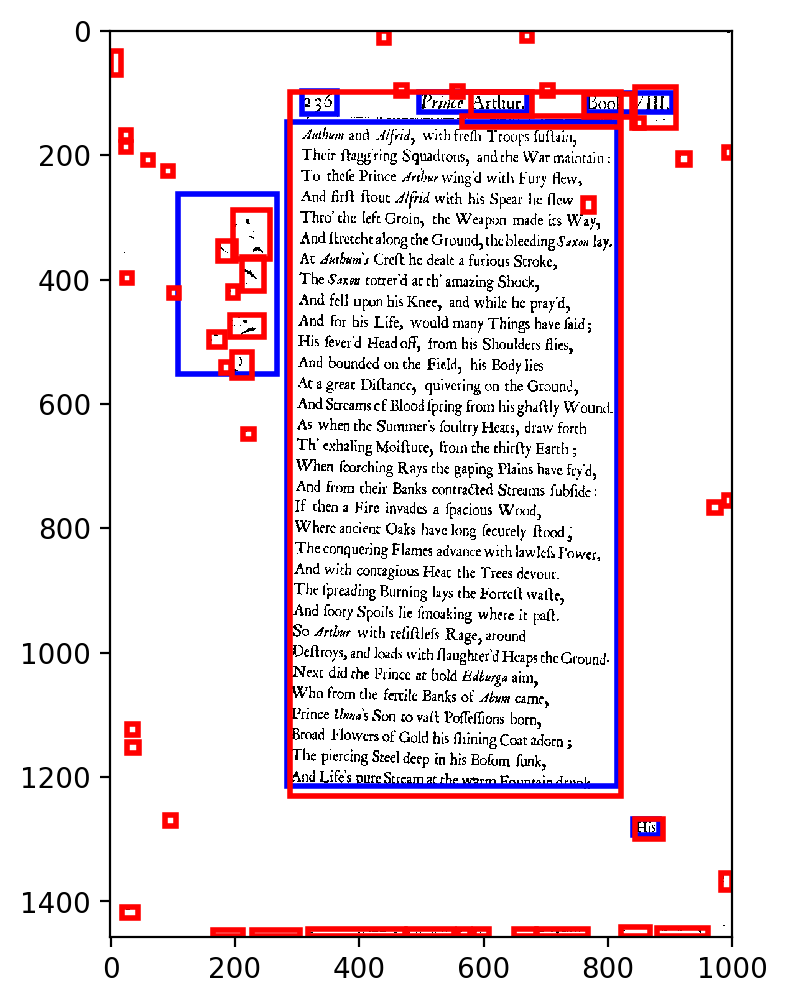

In [40]:
# ##########
#
# 2. Load an image and then display the ground truth roi
#
# ##########
from lib.ImgProcessor import ImgProcessor
import matplotlib.pyplot as plt
import numpy as np
from lib.utils.Utils import *
from lib.OCREngine import OCREngine
import pickle

# 1. parameters
root_dir = './sample'
img_id = '639'
fname = '%s.png' %img_id
ocr_engine = 'cv2'
f = '%s/%s' % (root_dir,fname)

# 2. Load the image
imgProcessor = ImgProcessor()
img = imgProcessor.loadImage(inFilename=f)

# 3. preprocess the image
img = imgProcessor.quickPreprocess(img)

# 4. load the image ground truth
img_roi_ground_truth = all_ground_truth[img_id]

# 5. define the OCR
# define engine
ocr = OCREngine(ocr_engine)
img_roi_ocr, data_df = ocr.image_to_data(img)

# plot the rois and plot only certain information according to the set
roi_level_set = set([2])
rois = [(img_roi_ground_truth,'b'), (img_roi_ocr,'r')]
plt_img(img, rois=rois, roi_level_set=roi_level_set)

# save the plot
plt.savefig('./result/%s_%s_boxes.png' %(fname,ocr_engine))

# save the bounding boxes to txt
save_rois(img_roi_ground_truth,'./result/%s_imgROIs_ground_truth.txt' %fname)
save_rois(img_roi_ocr,'./result/%s_imgROIs.txt' %fname)

# save the bounding boxes to pickle
with open('./result/%s_imgROIs.pkl' %fname,'wb') as f:
    pickle.dump({'ocr':img_roi_ocr, 'ground_truth':img_roi_ground_truth},f)

